In [34]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier #clasificador
from sklearn.model_selection import train_test_split #funciones de particion
from sklearn import metrics # metricas de scikit learn
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus 
import os

In [35]:
df = pd.read_csv('rating-peliculas.csv')

In [36]:
df.columns


Index(['pelicula', 'genero', 'ratings-rotten', 'ratings-audiencia',
       'costo-millones-usd', 'ano-estreno'],
      dtype='object')

In [37]:
df.describe()

,ratings-rotten,ratings-audiencia,costo-millones-usd,ano-estreno
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [38]:
y = df.genero
y.value_counts()

Comedy       172
Action       154
Drama        101
Horror        49
Thriller      36
Adventure     29
Romance       18
Name: genero, dtype: int64

In [39]:
len(y)

559

In [67]:
x = df.drop(['pelicula','genero'], axis = 1)



In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)


In [69]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth= 3 )
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)


In [70]:
y_pred

array(['Drama', 'Comedy', 'Action', 'Drama', 'Comedy', 'Action', 'Comedy',
       'Action', 'Comedy', 'Action', 'Drama', 'Comedy', 'Comedy', 'Drama',
       'Drama', 'Comedy', 'Drama', 'Drama', 'Action', 'Drama', 'Action',
       'Comedy', 'Comedy', 'Drama', 'Comedy', 'Comedy', 'Drama', 'Drama',
       'Comedy', 'Comedy', 'Comedy', 'Action', 'Comedy', 'Comedy',
       'Action', 'Drama', 'Comedy', 'Comedy', 'Action', 'Action',
       'Action', 'Action', 'Drama', 'Comedy', 'Comedy', 'Drama', 'Drama',
       'Action', 'Action', 'Drama', 'Action', 'Drama', 'Action', 'Action',
       'Comedy', 'Comedy', 'Action', 'Action', 'Drama', 'Drama', 'Drama',
       'Action', 'Comedy', 'Action', 'Drama', 'Action', 'Action',
       'Comedy', 'Comedy', 'Comedy', 'Action', 'Comedy', 'Comedy',
       'Comedy', 'Comedy', 'Comedy', 'Comedy', 'Action', 'Action',
       'Comedy', 'Comedy', 'Drama', 'Comedy', 'Drama', 'Comedy', 'Action',
       'Drama', 'Action', 'Comedy', 'Comedy', 'Drama', 'Drama', 'Action'

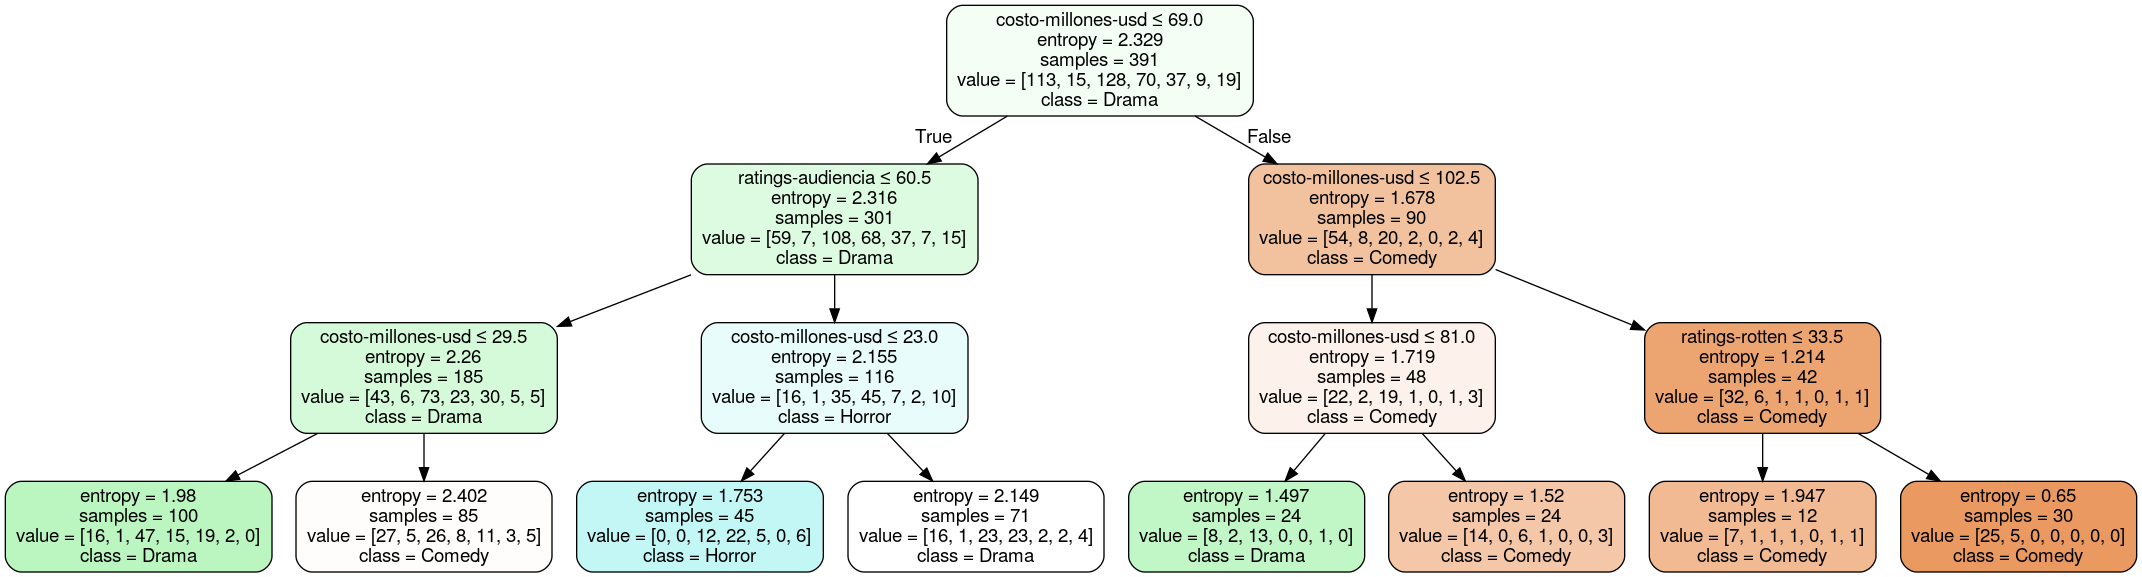

In [71]:
dot_data = StringIO()
export_graphviz(clf,out_file=dot_data, filled=True, rounded=True, special_characters=True, 
                    feature_names=x.columns, class_names=y.value_counts().index)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png('peliculas.png')
Image(graph.create_png())

In [72]:
metrics.accuracy_score(y_test,y_pred)

0.31547619047619047